# Working with large data set

In this workshop, we will use real data imported from csv file (boston.csv) instead of made-up ones

In [2]:
# import everything we need
import numpy as np
import pandas as pd

In [3]:
''' 
Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's
 '''

" \nVariables in order:\n CRIM     per capita crime rate by town\n ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n INDUS    proportion of non-retail business acres per town\n CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n NOX      nitric oxides concentration (parts per 10 million)\n RM       average number of rooms per dwelling\n AGE      proportion of owner-occupied units built prior to 1940\n DIS      weighted distances to five Boston employment centres\n RAD      index of accessibility to radial highways\n TAX      full-value property-tax rate per $10,000\n PTRATIO  pupil-teacher ratio by town\n B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\n LSTAT    % lower status of the population\n MEDV     Median value of owner-occupied homes in $1000's\n "

### Construct a dataframe for our data and target for a better illustration
### set the columns names according to the result above and show the first 5 rows

In [3]:
# Construct a dataframe for our data and target for a better illustration
# set the columns names according to the result above

df = pd.read_csv('boston.csv', index_col=0)
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Model Training

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
# notice that we need double square brackets to select X
# inner bracket is a list
# outer bracker accesses a subset of the original DataFrame

features = df[['RM']]
median_value = df['MEDV']

x_train, x_test, y_train, y_test = train_test_split(
    features,
    median_value,
    test_size=0.2,
    random_state=42
)


In [8]:
# We need 2D arrays for x_train 

x_train.shape
print(x_train)


        RM
477  5.304
15   5.834
332  6.031
423  6.103
19   5.727
..     ...
106  5.836
270  5.856
348  6.635
435  6.629
102  6.405

[404 rows x 1 columns]


In [9]:
# instantiate a linear regression model
# train the model to fit the training data, finding the coef and intercept

from sklearn.linear_model import LinearRegression

#instantiate
linReg = LinearRegression()

linReg.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# Prediction

Now that we've trained our model, the next step is to predict the data.

Steps:

    Get predictions, 𝑦̂, using LinearRegression.predict()


In [11]:
from sklearn.metrics import r2_score

y_pred = linReg.predict(x_test)
print('r2_score: ', r2_score(y_test, y_pred))

r2_score:  0.3707569232254778


# Model Validation

We want to see how well our model fits the data. r2-score should be as close to 1 as possible

In [12]:
# we can see the coefficient and intercept our model finds
print(linReg.intercept_)
print(linReg.coef_)

-36.24631889813795
[9.34830141]


As the r2-score isn't very close to 1, our linear regression model doesn't really fit the data well
We can visualize it to see what the model looks like

In [13]:
import matplotlib.pyplot as plt




Plot the regression line (blue) vs the actual value (red)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


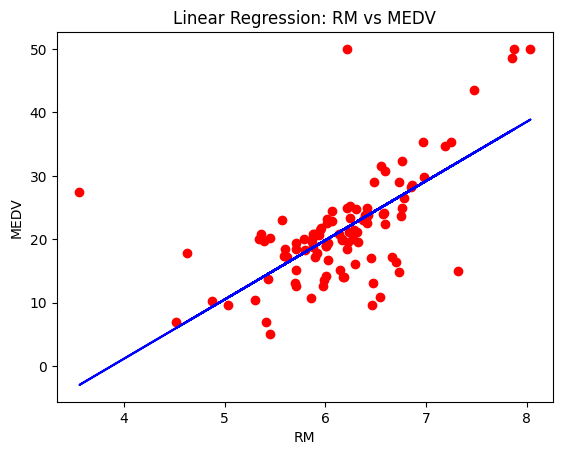

In [21]:
# We want to plot the regression line(blue) vs the actual value(red)

plt.scatter(x_test, y_test, color='red', label='Actual')

X_sorted = np.sort(x_test.values.reshape(-1, 1))
y_sorted_pred = linReg.predict(X_sorted)

plt.plot(X_sorted, y_sorted_pred, color='blue', label='Regression Line')

plt.xlabel('RM')
plt.ylabel('MEDV')
plt.title('Linear Regression: RM vs MEDV')
plt.show()